### Read Raw Seabird CSV file for Quicklook

In [64]:
import warnings
#remove the numpy/pandas/cython warnings
warnings.filterwarnings(action='ignore', message="numpy.dtype size changed,")

import ctd
import pandas as pd

# science stack
import numpy as np

# Visual Stack

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline


In [65]:
f = '/Users/bell/ecoraid/2018/CTDcasts/HE1801/WHOI_processed/bob_processed/HLY1801_043.cnv'

In [66]:
ctd_df = ctd.from_cnv(f)

/Users/bell/anaconda2/envs/py36/lib/python3.6/site-packages/ctd/ctd.py:147: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.header = header
/Users/bell/anaconda2/envs/py36/lib/python3.6/site-packages/ctd/ctd.py:149: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.config = config


In [67]:
ctd_df.describe()

,depSM,t090C,t190C,c0mS/cm,c1mS/cm,flECO-AFL,CStarTr0,svCM,altM,scan,sbeox0V,sbeox1V,timeS,sal00,sal11,sbeox0ML/L,sbeox1ML/L,nbin
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,26.808848,-0.077580,-0.080420,26.526984,26.526444,4.457293,88.399687,1445.372826,26.412826,4936.869565,2.406109,2.265207,205.662457,31.800528,31.802807,7.890754,7.822809,9.695652
std,13.706792,2.159071,2.160200,0.699635,0.700431,1.720706,5.999004,8.737591,14.359795,1029.852710,0.297407,0.285705,42.910452,1.292432,1.292835,1.086439,1.140659,6.930992
min,3.959000,-1.678300,-1.685000,25.836656,25.831726,2.490400,80.936700,1438.360000,2.530000,3298.000000,2.123200,2.005800,137.362000,29.721400,29.724500,7.029800,6.973100,1.000000
25%,15.094250,-1.647775,-1.647800,26.057567,26.058501,2.604600,82.830150,1439.055000,14.350000,4076.250000,2.133900,2.014525,169.817250,30.194050,30.195225,7.066150,7.003625,4.250000
50%,27.218500,-1.599000,-1.598850,26.060132,26.061889,4.467150,85.658500,1439.200000,25.955000,4909.500000,2.254700,2.101250,204.527000,32.570650,32.570700,7.587700,7.407250,8.000000
75%,38.351500,2.421475,2.425525,27.254216,27.258319,5.510350,95.591250,1454.650000,38.680000,5670.000000,2.588775,2.434350,236.219500,32.788500,32.790875,8.173425,8.054900,13.750000
max,49.485000,3.631600,3.623200,27.858415,27.866441,7.970200,95.921800,1470.080000,50.200000,7231.000000,3.101400,2.971300,301.263000,33.169100,33.171800,11.040300,11.268400,26.000000


In [68]:
ctd_df.to_csv(f.split('/')[-1].replace('.cnv','.csv'))

### Define a Class object for all plots

In [69]:
class CTDProfilePlot(object):


    def __init__(self, fontsize=10, labelsize=10, plotstyle='k-.', stylesheet='seaborn-ticks'):
        """Initialize the timeseries with items that do not change.

        This sets up the axes and station locations. The `fontsize` and `spacing`
        are also specified here to ensure that they are consistent between individual
        station elements.

        Parameters
        ----------
        fontsize : int
            The fontsize to use for drawing text
        labelsize : int
          The fontsize to use for labels
        stylesheet : str
          Choose a mpl stylesheet [u'seaborn-darkgrid', 
          u'seaborn-notebook', u'classic', u'seaborn-ticks', 
          u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', 
          u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', 
          u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', 
          u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', 
          u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', 
          u'seaborn-dark-palette']
        """

        self.fontsize = fontsize
        self.labelsize = labelsize
        self.plotstyle = plotstyle
        self.max_xticks = 10
        plt.style.use(stylesheet)
        mpl.rcParams['svg.fonttype'] = 'none'
        mpl.rcParams['ps.fonttype'] = 42 #truetype/type2 fonts instead of type3
        mpl.rcParams['pdf.fonttype'] = 42 #truetype/type2 fonts instead of type3
        mpl.rcParams['axes.grid'] = True
        mpl.rcParams['axes.edgecolor'] = 'white'
        mpl.rcParams['axes.linewidth'] = 0.25
        mpl.rcParams['grid.linestyle'] = '--'
        mpl.rcParams['grid.linestyle'] = '--'
        mpl.rcParams['xtick.major.size'] = 2
        mpl.rcParams['xtick.minor.size'] = 1
        mpl.rcParams['xtick.major.width'] = 0.25
        mpl.rcParams['xtick.minor.width'] = 0.25
        mpl.rcParams['ytick.major.size'] = 2
        mpl.rcParams['ytick.minor.size'] = 1
        mpl.rcParams['xtick.major.width'] = 0.25
        mpl.rcParams['xtick.minor.width'] = 0.25
        mpl.rcParams['ytick.direction'] = 'out'
        mpl.rcParams['xtick.direction'] = 'out'
        mpl.rcParams['ytick.color'] = 'grey'
        mpl.rcParams['xtick.color'] = 'grey'
        
    def plot2var(self, epic_key=None, xdata=None, ydata=None, xlabel=None, secondary=False, **kwargs):
      fig = plt.figure(1)
      ax1 = fig.add_subplot(111)
      p1 = ax1.plot(xdata[0], ydata)
      plt.setp(p1, color=self.var2format(epic_key[0])['color'],
                   linestyle=self.var2format(epic_key[0])['linestyle'],
                   linewidth=self.var2format(epic_key[0])['linewidth'])
      if secondary and not (xdata[1].size == 0):
        p1 = ax1.plot(xdata[1],ydata)
        plt.setp(p1, color=self.var2format(epic_key[1])['color'],
                     linestyle=self.var2format(epic_key[1])['linestyle'],
                     linewidth=self.var2format(epic_key[1])['linewidth'])
        #set plot limits for two vars by finding the absolute range and adding 10%
        abmin=np.min([np.nanmin(xdata[0]),np.nanmin(xdata[1])])
        abmax=np.max([np.nanmax(xdata[0]),np.nanmax(xdata[1])])
        ax1.set_xlim([abmin - 0.1*(abmax-abmin),abmax + 0.1*(abmax-abmin)])

      ax1.invert_yaxis()
      plt.ylabel('Depth (dB)', fontsize=self.labelsize, fontweight='bold')
      plt.xlabel(xlabel[0], fontsize=self.labelsize, fontweight='bold')
    
      fmt=mpl.ticker.StrMethodFormatter(self.var2format(epic_key[0])['format'])
      ax1.xaxis.set_major_formatter(fmt)
      ax1.tick_params(axis='both', which='major', labelsize=self.labelsize)

      #plot second param
      ax2 = ax1.twiny()
      p1 = ax2.plot(xdata[2], ydata)
      plt.setp(p1, color=self.var2format(epic_key[2])['color'],
                   linestyle=self.var2format(epic_key[2])['linestyle'],
                   linewidth=self.var2format(epic_key[2])['linewidth'])
      if secondary and not (xdata[3].size == 0):
        p1 = ax2.plot(xdata[3],ydata)
        plt.setp(p1, color=self.var2format(epic_key[3])['color'],
                     linestyle=self.var2format(epic_key[3])['linestyle'],
                     linewidth=self.var2format(epic_key[3])['linewidth'])
        #set plot limits for two vars by finding the absolute range and adding 10%
        abmin=np.min([np.nanmin(xdata[2]),np.nanmin(xdata[3])])
        abmax=np.max([np.nanmax(xdata[2]),np.nanmax(xdata[3])])
        try:
          ax2.set_xlim([abmin - 0.1*(abmax-abmin),abmax + 0.1*(abmax-abmin)])
        except:
          ax2.set_xlim([0,1])

      plt.ylabel('Depth (dB)', fontsize=self.labelsize, fontweight='bold')
      plt.xlabel(xlabel[1], fontsize=self.labelsize, fontweight='bold')

      #set xticks and labels to be at the same spot for all three vars
      ax1.set_xticks(np.linspace(ax1.get_xbound()[0], ax1.get_xbound()[1], self.max_xticks))
      ax2.set_xticks(np.linspace(ax2.get_xbound()[0], ax2.get_xbound()[1], self.max_xticks))

      fmt=mpl.ticker.StrMethodFormatter(self.var2format(epic_key[2])['format'])
      ax2.xaxis.set_major_formatter(fmt)
      ax2.tick_params(axis='x', which='major', labelsize=self.labelsize)


      return plt, fig

    @staticmethod
    def var2format(epic_key):
      """list of plot specifics based on variable name"""
      plotdic={}
      if epic_key in ['T_28']:
        plotdic['color']='red'
        plotdic['linestyle']='-'
        plotdic['linewidth']=0.5
        plotdic['format']='{x:.3f}'
      elif epic_key in ['T2_35']:
        plotdic['color']='magenta'
        plotdic['linestyle']='--'
        plotdic['linewidth']=0.5
        plotdic['format']='{x:.3f}'
      elif epic_key in ['S_41', 'OST_62', 'O_65']:
        plotdic['color']='blue'
        plotdic['linestyle']='-'
        plotdic['linewidth']=0.5
        if epic_key in ['S_41']:
          plotdic['format']='{x:.3f}'
        else:
          plotdic['format']='{x:3.1f}'
      elif epic_key in ['S_42', 'CTDOST_4220', 'CTDOXY_4221']:
        plotdic['color']='cyan'
        plotdic['linestyle']='--'
        plotdic['linewidth']=0.5
        plotdic['format']='{x:3.1f}'
        if epic_key in ['S_42']:
          plotdic['format']='{x:.3f}'
        else:
          plotdic['format']='{x:3.1f}'
      elif epic_key in ['ST_70','Trb_980','SigmaT']:
        plotdic['color']='black'
        plotdic['linestyle']='-'
        plotdic['linewidth']=0.5
        plotdic['format']='{x:.3f}'
      elif epic_key in ['F_903','fWS_973','Fch_906']:
        plotdic['color']='green'
        plotdic['linestyle']='-'
        plotdic['linewidth']=0.5
        plotdic['format']='{x:.2f}'
      elif epic_key in ['PAR_905']:
        plotdic['color']='darkorange'
        plotdic['linestyle']='-'
        plotdic['linewidth']=0.75
        plotdic['format']='{x:5.0f}'
      else:
        plotdic['color']='black'
        plotdic['linestyle']='--'
        plotdic['linewidth']=1.0      
        plotdic['format']='{x:.3f}'

      return plotdic

    @staticmethod
    #python3 change as dictionaries no longer have itervalues methods
    def make_patch_spines_invisible(ax):
        ax.set_frame_on(True)
        ax.patch.set_visible(False)
        for sp in ax.spines.values():
            sp.set_visible(False)

### Create and Save Plots

Inputs are the respective columns in the data fram and identifiers for coloring.

In [70]:
ctd_data = CTDProfilePlot()

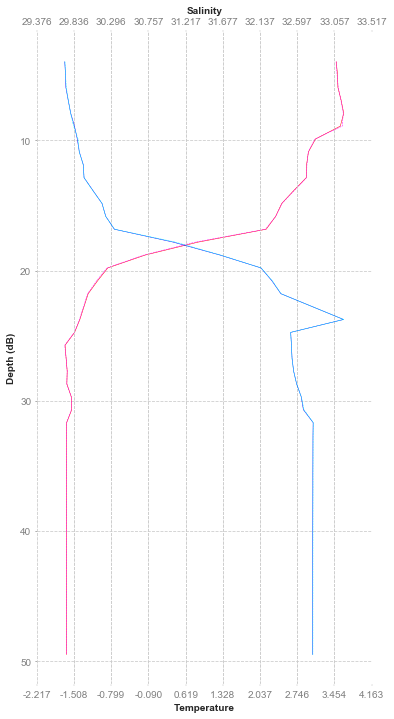

In [71]:
plt,fig =ctd_data.plot2var(epic_key=['T_28','T2_35','S_41','S_42'],
                  xdata=[ctd_df.t090C,ctd_df.t190C,ctd_df.sal00,ctd_df.sal11],
                  ydata=ctd_df.depSM,
                  secondary=True,
                  xlabel=['Temperature','Salinity'])

DefaultSize = fig.get_size_inches()
fig.set_size_inches( (DefaultSize[0], DefaultSize[1]*3) )
plt.savefig(f.split('/')[-1].replace('.cnv','png'))